In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
import math
import os

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.fake_provider import FakeManilaV2, FakeBelemV2
from qiskit import transpile
from qiskit.tools.visualization import plot_histogram
import time
from multiprocessing import Pool
pi = math.pi
backend = FakeManilaV2()
# backend = FakeBelemV2()

backends = ['fakemanilaV2', 'fakebelemV2']
methods = ['sabre', 'stochastic', 'none']

In [3]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

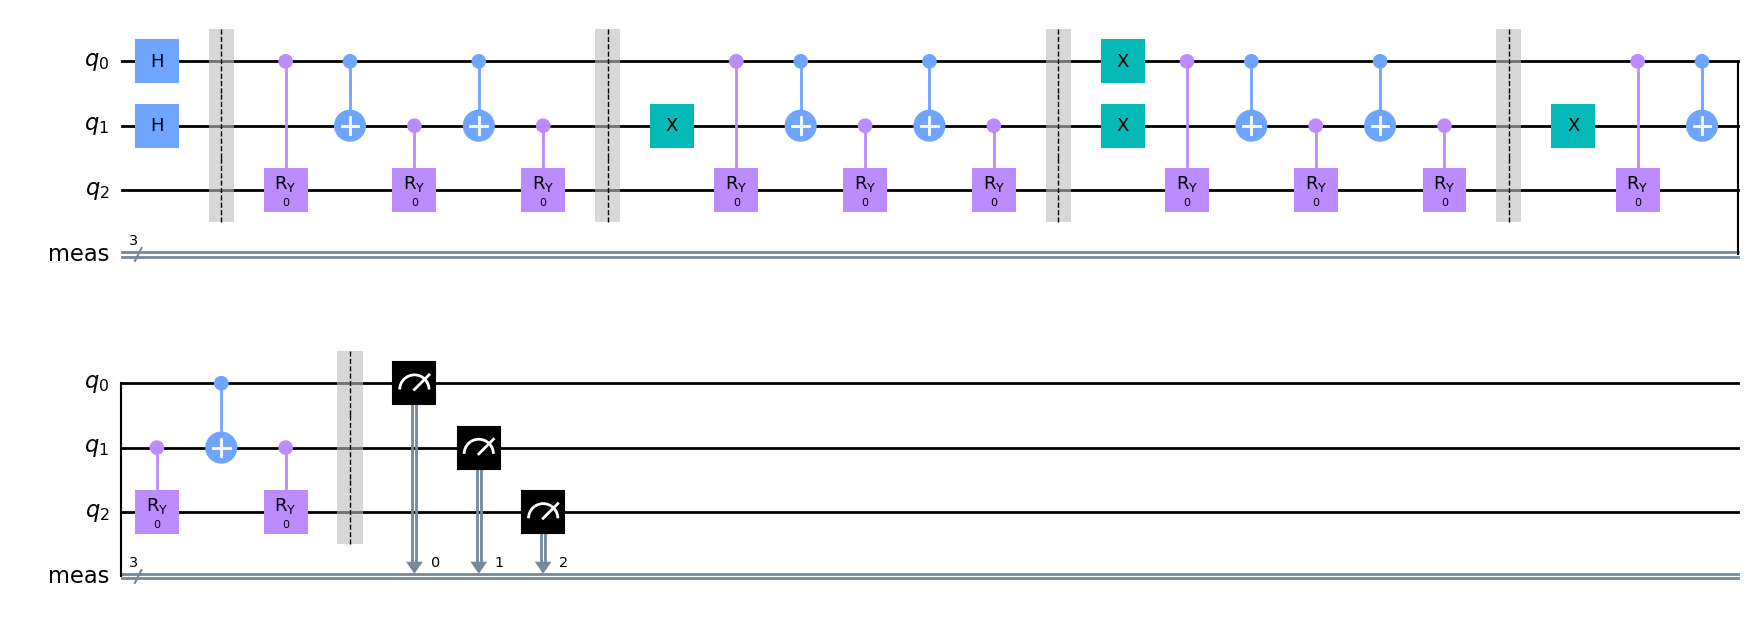

In [4]:
theta = 0 # all pixels black
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw()

{'011': 1050, '000': 987, '010': 996, '001': 1063}


/tmp/ipykernel_372/2779474364.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(qobj).result()


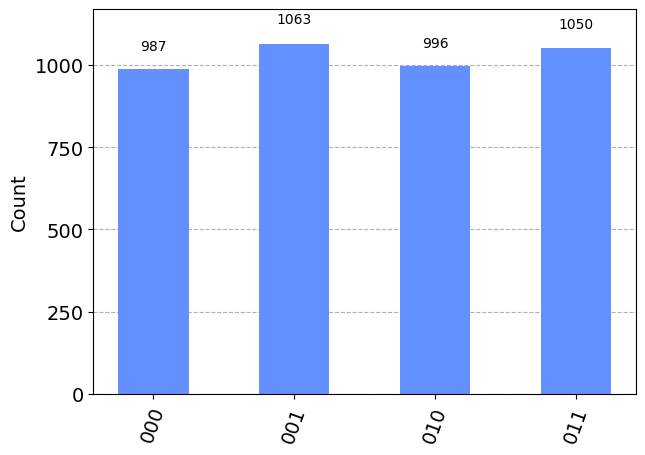

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

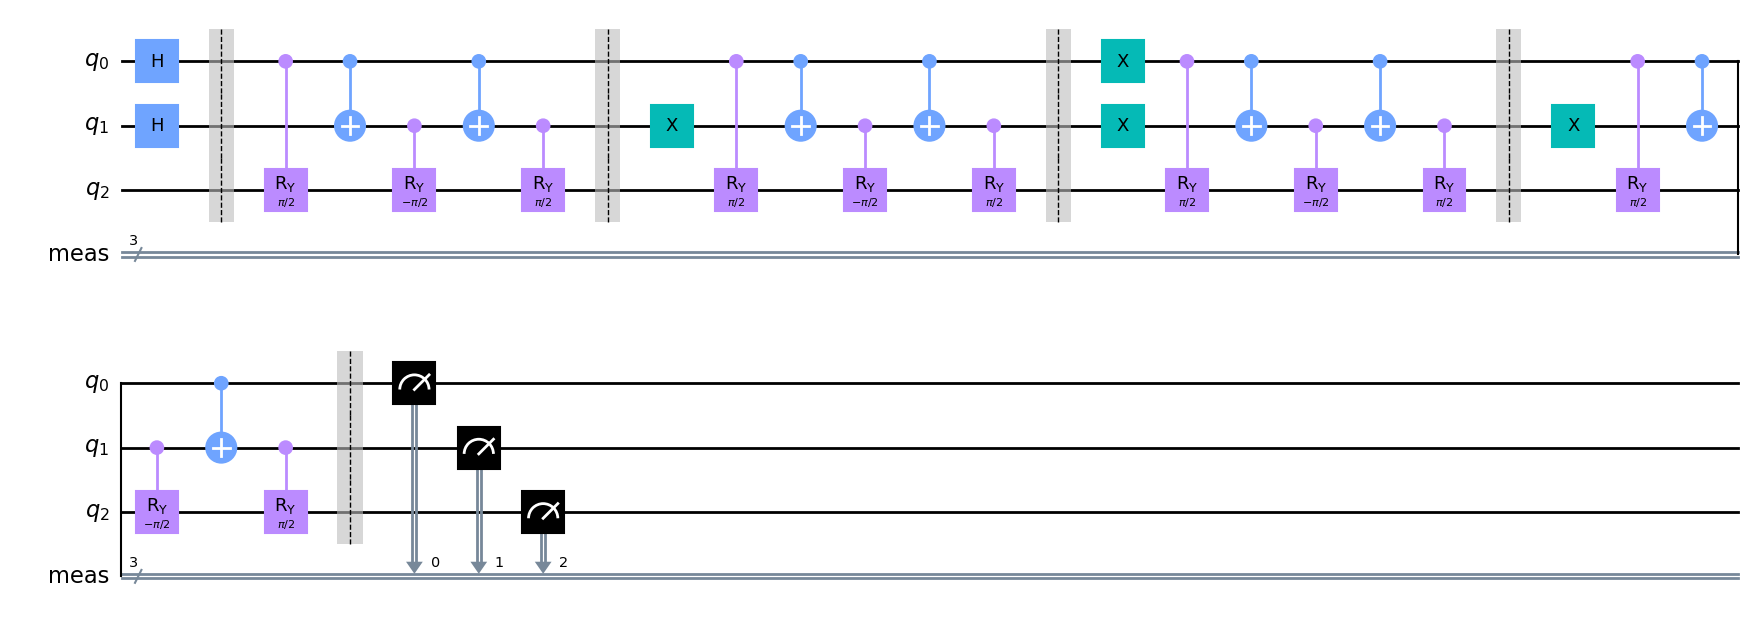

In [6]:
theta = pi/2  # all pixels white
qc1 = QuantumCircuit(3)

qc1.h(0)
qc1.h(1)

qc1.barrier()
#Pixel 1

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()
#Pixel 2

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

qc1.x(1)
qc1.x(0)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)


qc1.barrier()

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.measure_all()

qc1.draw()

{'110': 1088, '100': 1020, '101': 955, '111': 1033}


/tmp/ipykernel_372/1775918648.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(qobj).result()


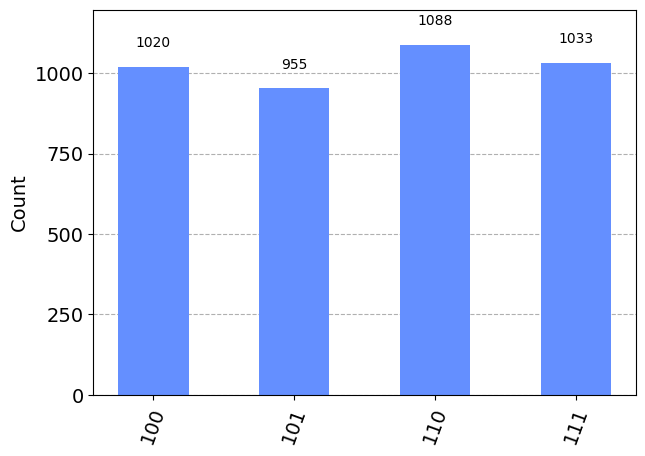

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc1 = transpile(qc1, aer_sim)
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

In [8]:
print("Depth: ", qc1.depth())
print("Operations: ", qc1.count_ops())

Depth:  23
Operations:  OrderedDict([('cry', 12), ('cx', 8), ('barrier', 5), ('x', 4), ('measure', 3), ('h', 2)])


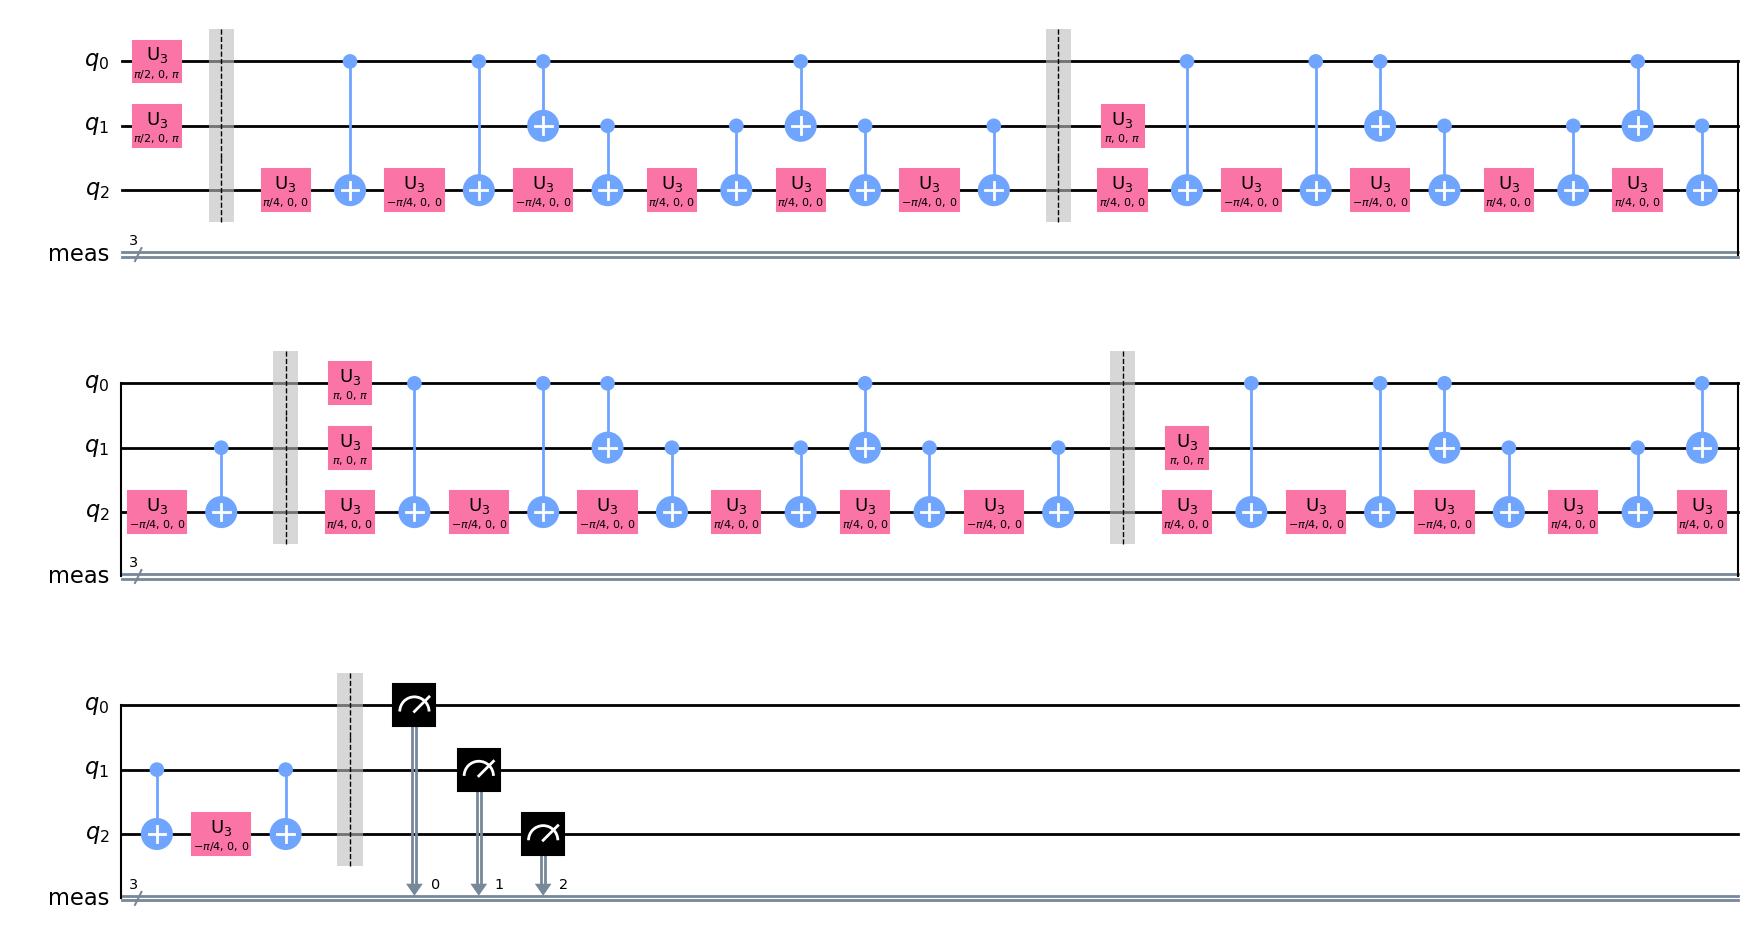

In [9]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc1)
new_circ.draw()

In [10]:
print("Depth : ", new_circ.depth())
print("Operations: ", new_circ.count_ops())

Depth :  50
Operations:  OrderedDict([('cx', 32), ('u3', 30), ('barrier', 5), ('measure', 3)])


In [11]:
from qiskit.providers.fake_provider import FakeAthens
fake_athens = FakeAthens()
# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = fake_athens.configuration().coupling_map
optimized_3 = transpile(qc1, backend=fake_athens, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('rz', 59), ('sx', 55), ('cx', 51), ('barrier', 5), ('x', 4), ('measure', 3)])
depth =  147


In [12]:
# Importing standard Qiskit libraries
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, execute, Aer, IBMQ
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
import matplotlib.pyplot as plt

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()


/tmp/ipykernel_372/3277775380.py:25: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [13]:
transpiled_circuit = transpile(qc1, backend)
t2 = time.time()
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
print(time.time() - t2)

0.16065716743469238
